# Pre Processing Images

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import cv2

from datetime import datetime
from sklearn.utils import check_random_state
from sklearn.linear_model import LogisticRegression
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report


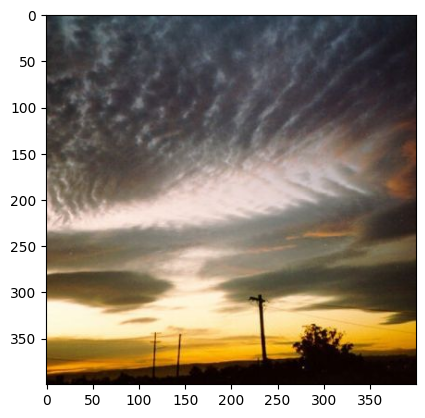

In [ ]:
import os
# identifyign folders/labels
cloud_labels = os.listdir("../resources/cloud-images/CCSN_v2")
# Removing the .DS_Store file - autogenerated metadata for a folder - native to macOS
if ".DS_Store" in cloud_labels: cloud_labels.remove(".DS_Store")

labeled_data = {}

for label in cloud_labels:
    cloud_images = os.listdir("../resources/cloud-images/CCSN_v2/" + label)
    for image in cloud_images:
        labeled_data[image] =  [{'label': label}]

sample_image = cv2.imread("../resources/cloud-images/CCSN_v2/Ac/Ac-N001.jpg")
image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [ ]:
train_images = []
train_labels = []

start_datetime = datetime.now()

for (i, image_file) in enumerate(labeled_data):
    path = '../resources/cloud-images/CCSN_v2/'+ labeled_data[image_file][0]['label'] + '/' + image_file
    print(path)
    image = cv2.imread(path)
    plt.imshow(image)
    plt.show()
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    label = cloud_labels.index(labeled_data[image_file][0]['label'])
    tmp_label = labeled_data[image_file][0]['label']
    image = cv2.resize(image, (32, 32))
    pixels = image.flatten()
    train_images.append(pixels)
    train_labels.append(label)
    print('Loaded...', '\U0001F483', 'Image', str(i+1), 'is a', tmp_label)
    plt.imshow(image)
    plt.show()

end_datetime = datetime.now()

In [11]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

X, y = train_images,train_labels

In [12]:
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

print(len(X))

2543


In [13]:
print('Image Processing Duration: ' + str(end_datetime-start_datetime))

# Splitting the data
test_size = 0.3

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=None)

Image Processing Duration: 0:03:57.693492


In [19]:
clf = LogisticRegression(C=0.01, penalty="l1", solver="saga", tol=0.1)


clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)

print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

Sparsity with L1 penalty: 0.16%
Test score with L1 penalty: 0.2412


/Users/lucasnseyep/code/LucasNseyep/belle-weder/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/lucasnseyep/code/LucasNseyep/belle-weder/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/lucasnseyep/code/LucasNseyep/belle-weder/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/lucasnseyep/code/LucasNseyep/belle-weder/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/lucasnseyep/code/LucasNseyep/belle-weder/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/lucasnseyep/code/LucasNseyep/belle-weder/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: 

11


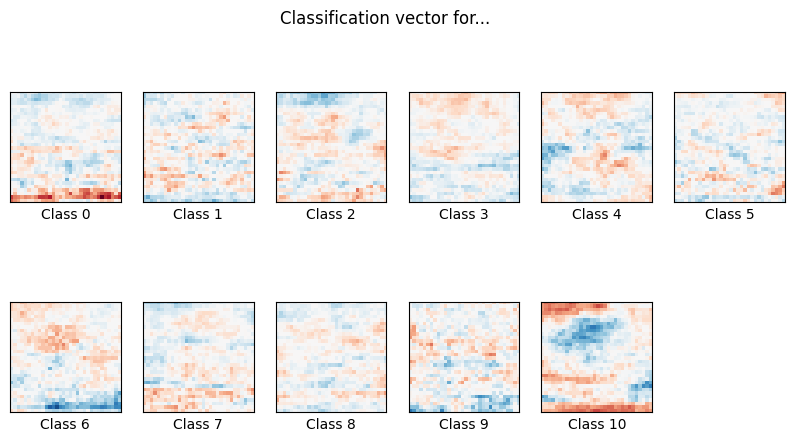

In [18]:
coef = clf.coef_.copy()

plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()

print(len(coef))

for i in range(11):
    l1_plot = plt.subplot(2, 6, i + 1)
    l1_plot.imshow(
        coef[i].reshape(32, 32),
        interpolation="nearest",
        cmap=plt.cm.RdBu,
        vmin=-scale,
        vmax=scale,
    )
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel(f"Class {i}")
plt.suptitle("Classification vector for...")
plt.show()

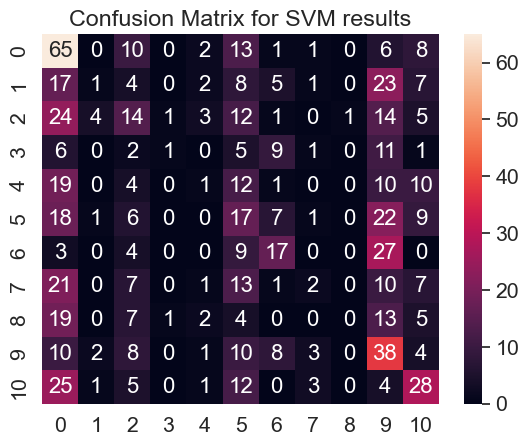

In [29]:
label_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

cmx = confusion_matrix(y_test, y_pred, labels=label_names)
df_cm = pd.DataFrame(cmx)

sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
title = "Confusion Matrix for SVM results"
plt.title(title)
plt.show()

In [30]:
# Detailed classification report

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=cloud_labels))

Classification Report:
              precision    recall  f1-score   support

          Sc       0.29      0.61      0.39       106
          Ac       0.11      0.01      0.03        68
          Ns       0.20      0.18      0.19        79
          Ci       0.33      0.03      0.05        36
          Cu       0.08      0.02      0.03        57
          Cs       0.15      0.21      0.17        81
          Ct       0.34      0.28      0.31        60
          St       0.17      0.03      0.05        62
          As       0.00      0.00      0.00        51
          Cc       0.21      0.45      0.29        84
          Cb       0.33      0.35      0.34        79

    accuracy                           0.24       763
   macro avg       0.20      0.20      0.17       763
weighted avg       0.21      0.24      0.20       763

